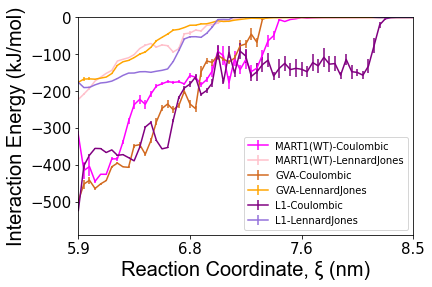

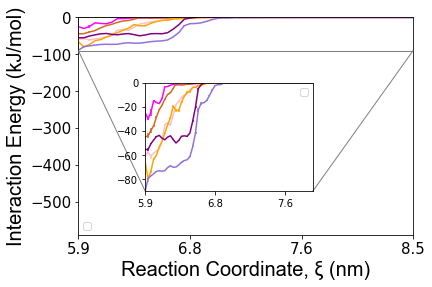

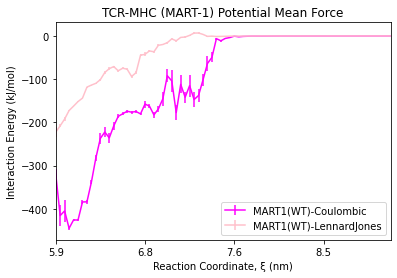

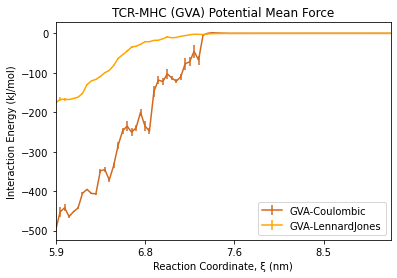

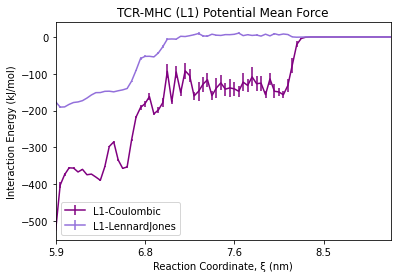

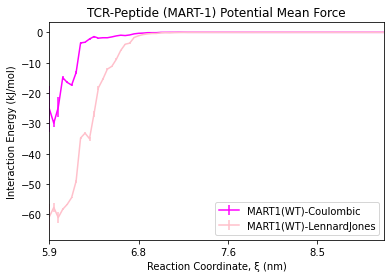

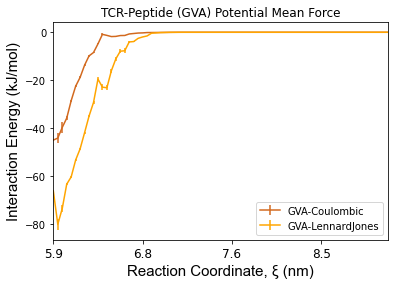

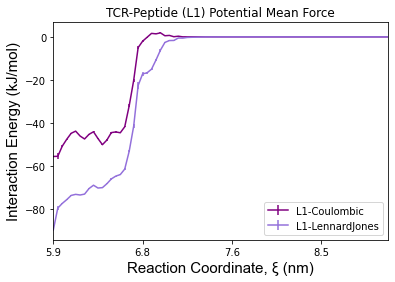

In [39]:
# Import IEx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

df = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/M1+/100/iex.xlsx')
df2 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/M1+/95/iex.xlsx')
df3 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/M1+/90/iex.xlsx')

df4 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/GVA+/100/iex.xlsx')
df5 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/GVA+/95/iex.xlsx')
df6 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/GVA+/90/iex.xlsx')

df7 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/L1+/100/iex.xlsx')
df8 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/L1+/95/iex.xlsx')
df9 = pd.read_excel (r'/Users/zrollins/Box/DMF5_MART1/L1+/90/iex.xlsx')

#Combine Mutant Data

df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)

df4 = df4.append(df5, ignore_index=True)
df4 = df4.append(df6, ignore_index=True)

df7 = df7.append(df8, ignore_index=True)
df7 = df7.append(df9, ignore_index=True)

#Bin IE for Distance
bins=np.linspace(5.884,14.612,200).tolist()
MHCc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['MHC-Coulombic'].agg(['mean','sem','size'])
MHClj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['MHC-LennardJones'].agg(['mean','sem','size'])
pepc = df.groupby(pd.cut(df['COM Distance'], bins=bins))['Peptide_Coulombic'].agg(['mean','sem','size'])
peplj = df.groupby(pd.cut(df['COM Distance'], bins=bins))['Peptide_LennardJones'].agg(['mean','sem','size'])

MHCc4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['MHC-Coulombic'].agg(['mean','sem','size'])
MHClj4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['MHC-LennardJones'].agg(['mean','sem','size'])
pepc4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['Peptide_Coulombic'].agg(['mean','sem','size'])
peplj4 = df4.groupby(pd.cut(df4['COM Distance'], bins=bins))['Peptide_LennardJones'].agg(['mean','sem','size'])

MHCc7 = df7.groupby(pd.cut(df7['COM Distance'], bins=bins))['MHC-Coulombic'].agg(['mean','sem','size'])
MHClj7 = df7.groupby(pd.cut(df7['COM Distance'], bins=bins))['MHC-LennardJones'].agg(['mean','sem','size'])
pepc7 = df7.groupby(pd.cut(df7['COM Distance'], bins=bins))['Peptide_Coulombic'].agg(['mean','sem','size'])
peplj7 = df7.groupby(pd.cut(df7['COM Distance'], bins=bins))['Peptide_LennardJones'].agg(['mean','sem','size'])

# Plot IE_X
ax = plt.gca()
MHCc.plot(kind='line', y='mean',yerr='sem', color='magenta', use_index=True, ax=ax)
MHClj.plot(kind='line',y='mean',yerr='sem', color='pink', use_index=True,ax=ax)
MHCc4.plot(kind='line',y='mean',yerr='sem', color='chocolate', use_index=True,ax=ax)
MHClj4.plot(kind='line',y='mean',yerr='sem', color='orange', use_index=True,ax=ax)
MHCc7.plot(kind='line',y='mean',yerr='sem', color='purple', use_index=True,ax=ax)
MHClj7.plot(kind='line',y='mean',yerr='sem', color='mediumpurple', use_index=True,ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 20)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 20)
xticks=bins[::20]
xticks=np.around(xticks,1)
plt.xticks(range(0,len(MHCc),20), xticks, fontsize=15)
plt.yticks(fontsize=15)
ax.legend(['MART1(WT)-Coulombic','MART1(WT)-LennardJones','GVA-Coulombic','GVA-LennardJones','L1-Coulombic','L1-LennardJones'])
#ax.set_title('TCR-MHC Potential Mean Force', fontname='Arial Black', fontsize= 20)
plt.xlim((0,60))
plt.ylim((-590,0))
plt.savefig('/Users/zrollins/Box/DMF5_MART1/ie_pmf_mhc.png',dpi=300, figsize=(20,20),bbox_inches='tight')
plt.show()

ax = plt.gca()
pepc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax)
peplj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax)
pepc4.plot(kind='line', y='mean',yerr='sem', color='chocolate', ax=ax)
peplj4.plot(kind='line',y='mean',yerr='sem', color='orange', ax=ax)
pepc7.plot(kind='line', y='mean',yerr='sem', color='purple', ax=ax)
peplj7.plot(kind='line',y='mean',yerr='sem', color='mediumpurple', ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 20)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 20)
plt.xticks(range(0,len(MHCc),20), xticks,fontsize=15)
plt.yticks(fontsize=15)
ax.legend([])
#ax.set_title('TCR-Peptide Potential Mean Force', fontname='Arial Black', fontsize= 20)
plt.xlim((0,60))
plt.ylim((-590,0))

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.2,0.2,0.5,0.5])
ax2.set_axes_locator(ip)
mark_inset(ax, ax2, loc1=3,loc2=4, fc="none",ec='0.5')
pepc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax2)
peplj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax2)
pepc4.plot(kind='line', y='mean',yerr='sem', color='chocolate', ax=ax2)
peplj4.plot(kind='line',y='mean',yerr='sem', color='orange', ax=ax2)
pepc7.plot(kind='line', y='mean',yerr='sem', color='purple', ax=ax2)
peplj7.plot(kind='line',y='mean',yerr='sem', color='mediumpurple', ax=ax2)
ax2.set_xticklabels(['8.5','5.9','6.8','7.6'])
ax2.set_xlim((0,60))
ax2.set_ylim(-90,0)
ax2.legend([])
ax2.set_xlabel('')
plt.savefig('/Users/zrollins/Box/DMF5_MART1/ie_pmf_pep.png',dpi=300, figsize=(20,20),bbox_inches='tight')
plt.show()


ax = plt.gca()
MHCc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax)
MHClj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)')
ax.set_xlabel('Reaction Coordinate, ξ (nm)')
ax.legend(['MART1(WT)-Coulombic','MART1(WT)-LennardJones'])
ax.set_title('TCR-MHC (MART-1) Potential Mean Force')
plt.xticks(range(0,len(MHCc),20), xticks)
plt.xlim((0,75))
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/ie_pmf_mhc.png')
plt.show()


ax = plt.gca()
MHCc4.plot(kind='line', y='mean',yerr='sem', color='chocolate', ax=ax)
MHClj4.plot(kind='line',y='mean',yerr='sem', color='orange', ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)')
ax.set_xlabel('Reaction Coordinate, ξ (nm)')
ax.legend(['GVA-Coulombic','GVA-LennardJones'])
ax.set_title('TCR-MHC (GVA) Potential Mean Force')
plt.xticks(range(0,len(MHCc),20), xticks)
plt.xlim((0,75))
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/ie_pmf_mhc.png')
plt.show()

ax = plt.gca()
MHCc7.plot(kind='line', y='mean',yerr='sem', color='purple', ax=ax)
MHClj7.plot(kind='line',y='mean',yerr='sem', color='mediumpurple', ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)')
ax.set_xlabel('Reaction Coordinate, ξ (nm)')
ax.legend(['L1-Coulombic','L1-LennardJones'])
ax.set_title('TCR-MHC (L1) Potential Mean Force')
plt.xticks(range(0,len(MHCc),20), xticks)
plt.xlim((0,75))
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/ie_pmf_mhc.png')
plt.show()

ax = plt.gca()
pepc.plot(kind='line', y='mean',yerr='sem', color='magenta', ax=ax)
peplj.plot(kind='line',y='mean',yerr='sem', color='pink', ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)')
ax.set_xlabel('Reaction Coordinate, ξ (nm)')
ax.legend(['MART1(WT)-Coulombic','MART1(WT)-LennardJones'])
ax.set_title('TCR-Peptide (MART-1) Potential Mean Force')
plt.xticks(range(0,len(MHCc),20), xticks)
plt.xlim((0,75))
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/ie_pmf_pep.png')
plt.show()

ax = plt.gca()
pepc4.plot(kind='line', y='mean',yerr='sem', color='chocolate', ax=ax)
peplj4.plot(kind='line',y='mean',yerr='sem', color='orange', ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 15)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 15)
ax.legend(['GVA-Coulombic','GVA-LennardJones'])
ax.set_title('TCR-Peptide (GVA) Potential Mean Force')
plt.xticks(range(0,len(MHCc),20), xticks, fontsize=12)

plt.xlim((0,75))
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/ie_pmf_pep.png')
plt.show()

ax = plt.gca()
pepc7.plot(kind='line', y='mean',yerr='sem', color='purple', ax=ax)
peplj7.plot(kind='line',y='mean',yerr='sem', color='mediumpurple', ax=ax)
ax.set_ylabel('Interaction Energy (kJ/mol)', fontname='Arial', fontsize= 15)
ax.set_xlabel('Reaction Coordinate, ξ (nm)', fontname='Arial', fontsize= 15)
ax.legend(['L1-Coulombic','L1-LennardJones'])
ax.set_title('TCR-Peptide (L1) Potential Mean Force')
plt.xticks(range(0,len(MHCc),20), xticks)
plt.xlim((0,75))
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/ie_pmf_pep.png')
plt.show()
